In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import datetime
from random import randint
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas_datareader import data as pdr
import fix_yahoo_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DateLocator, MONDAY
import seaborn as sns
import csv
from csv import writer
from sklearn.metrics import confusion_matrix




D:\Program Files\Python39\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


### Test Stocks (Stock Codes)
    ^GSPC    
    ES=F    
    CL=F    
    ONGC.NS    
    ICICIBANK.NS    
    NIO
    
    Date = 2021-09-20

In [59]:
stockname = input('Stock Name: ')
# stockname = stock_name
print('Data Source: Yahoo')
startdate = "2010-01-01"
enddate = "2021-10-18"

Data Source: Yahoo


In [60]:
print(stockname)

icicibank.ns


In [61]:
data = web.DataReader(stockname, data_source='yahoo',start=startdate,end=enddate)
data.reset_index(inplace=True,drop=False)

In [62]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2907.000000,2907.000000,2907.000000,2907.000000,2.907000e+03,2907.000000
mean,292.105214,284.293849,288.344792,288.221127,2.075814e+07,275.524647
std,132.129837,129.319849,130.794252,130.893818,1.376353e+07,137.542564
min,122.000000,116.545456,120.363632,118.800003,0.000000e+00,103.559731
25%,194.627274,189.768181,192.181824,192.209091,1.266911e+07,170.770180
50%,259.045441,252.909088,256.363647,255.772720,1.758599e+07,243.509552
75%,343.375000,328.693176,335.731827,335.400009,2.478034e+07,330.597809
max,748.900024,732.049988,739.000000,745.450012,2.868577e+08,745.450012


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2907 non-null   datetime64[ns]
 1   High       2907 non-null   float64       
 2   Low        2907 non-null   float64       
 3   Open       2907 non-null   float64       
 4   Close      2907 non-null   float64       
 5   Volume     2907 non-null   float64       
 6   Adj Close  2907 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 159.1 KB


In [64]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,160.909088,159.090912,159.454544,159.945450,9162186.0,135.624359
1,2010-01-05,163.590912,160.272720,161.454544,161.463638,14659997.0,136.911697
2,2010-01-06,164.972733,161.836365,162.727264,162.699997,20410054.0,137.960037
3,2010-01-07,163.045456,159.363632,163.045456,161.163635,10852286.0,136.657318
4,2010-01-08,161.818176,158.363632,161.654541,158.899994,20580934.0,134.737885


In [65]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,160.909088,159.090912,159.454544,159.945450,9162186.0,135.624359
1,2010-01-05,163.590912,160.272720,161.454544,161.463638,14659997.0,136.911697
2,2010-01-06,164.972733,161.836365,162.727264,162.699997,20410054.0,137.960037
3,2010-01-07,163.045456,159.363632,163.045456,161.163635,10852286.0,136.657318
4,2010-01-08,161.818176,158.363632,161.654541,158.899994,20580934.0,134.737885
...,...,...,...,...,...,...,...
2902,2021-10-11,719.400024,700.299988,702.000000,713.299988,9337637.0,713.299988
2903,2021-10-12,713.000000,704.400024,706.500000,708.599976,7376091.0,708.599976
2904,2021-10-13,715.900024,707.950012,713.849976,709.950012,6357766.0,709.950012
2905,2021-10-14,729.799988,709.049988,710.250000,727.299988,8950350.0,727.299988


<AxesSubplot:>

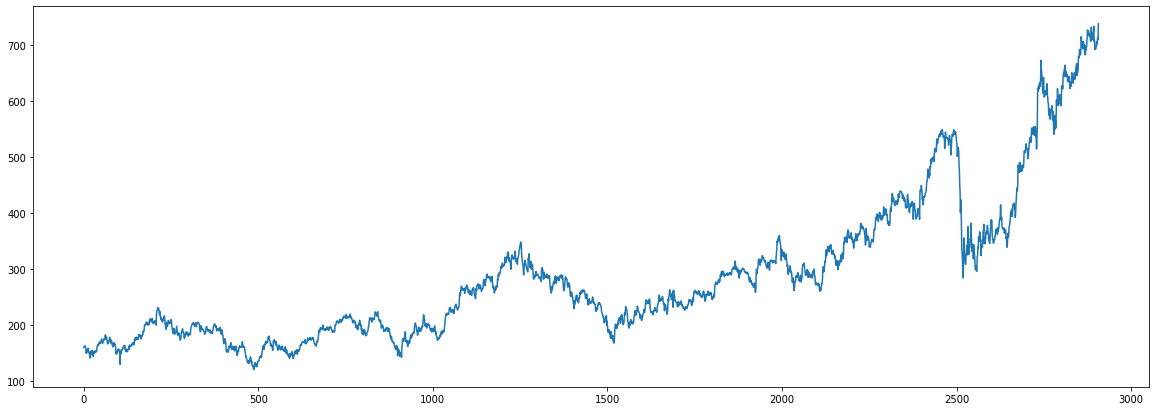

In [66]:
data['Open'].plot(figsize=(20,7))

<AxesSubplot:>

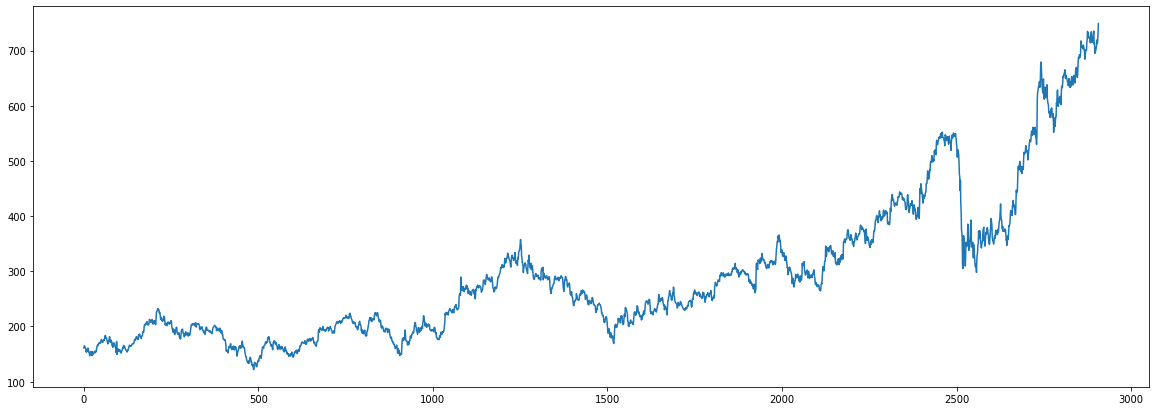

In [67]:
data['High'].plot(figsize=(20,7))

<AxesSubplot:>

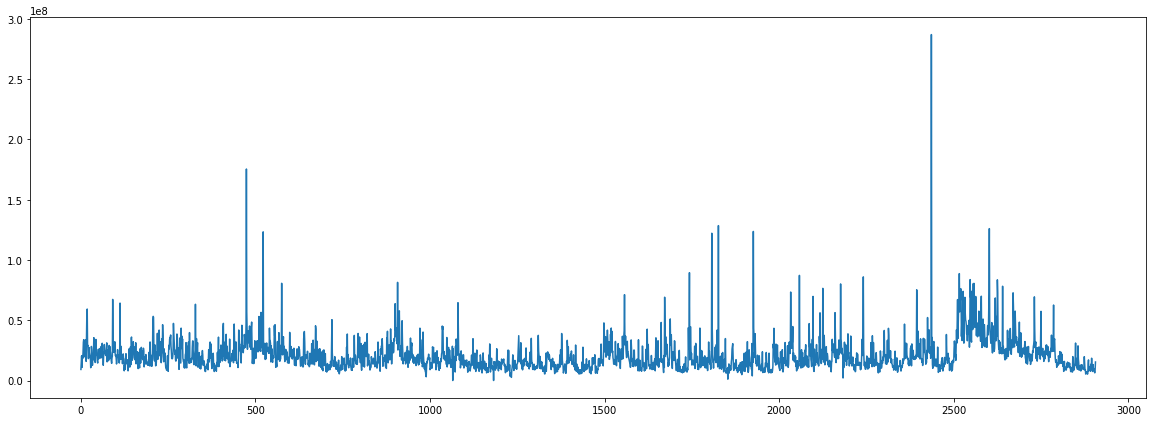

In [68]:
data['Volume'].plot(figsize=(20,7))

In [69]:
data['Total Traded'] = data['Open'] * data['Volume']

In [70]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded
0,2010-01-04,160.909088,159.090912,159.454544,159.945450,9162186.0,135.624359,1.460952e+09
1,2010-01-05,163.590912,160.272720,161.454544,161.463638,14659997.0,136.911697,2.366923e+09
2,2010-01-06,164.972733,161.836365,162.727264,162.699997,20410054.0,137.960037,3.321272e+09
3,2010-01-07,163.045456,159.363632,163.045456,161.163635,10852286.0,136.657318,1.769416e+09
4,2010-01-08,161.818176,158.363632,161.654541,158.899994,20580934.0,134.737885,3.327001e+09


<AxesSubplot:>

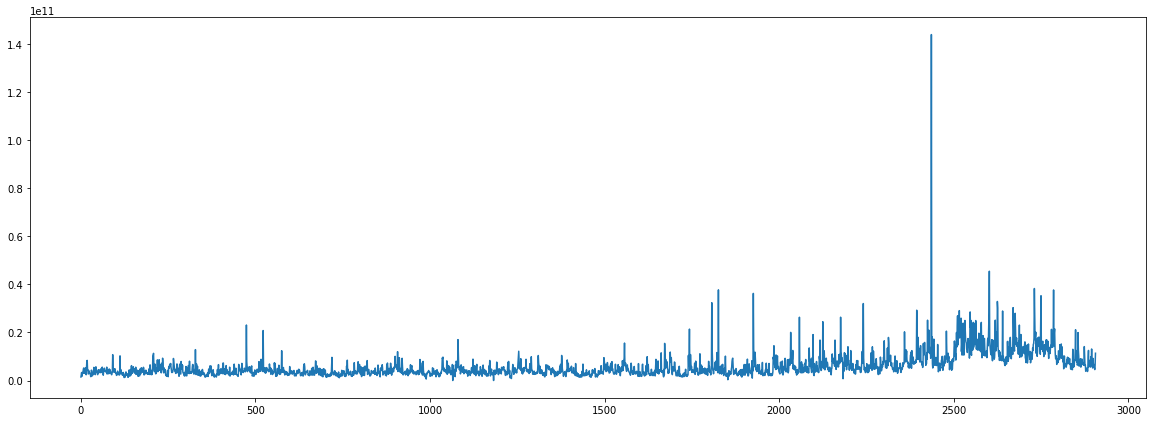

In [71]:
data['Total Traded'].plot(figsize=(20,7))

In [72]:
data.iloc[[data['Total Traded'].argmax()]]

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded
2436,2019-11-26,517.549988,501.0,501.799988,510.700012,286857658.0,509.209015,1.439452e+11


In [73]:
data['Total Traded'].argmax()

2436

<AxesSubplot:>

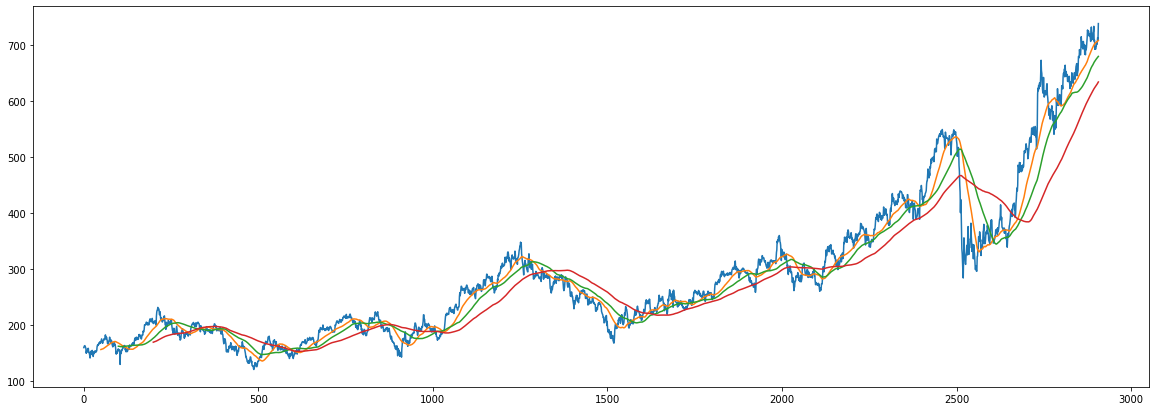

In [74]:
data['Open'].plot(label = 'No Moving Average', figsize=(20,7))
data['MA50'] = data['Open'].rolling(50).mean()
data['MA50'].plot()
data['MA100'] = data['Open'].rolling(100).mean()
data['MA100'].plot()
data['MA200'] = data['Open'].rolling(200).mean()
data['MA200'].plot()


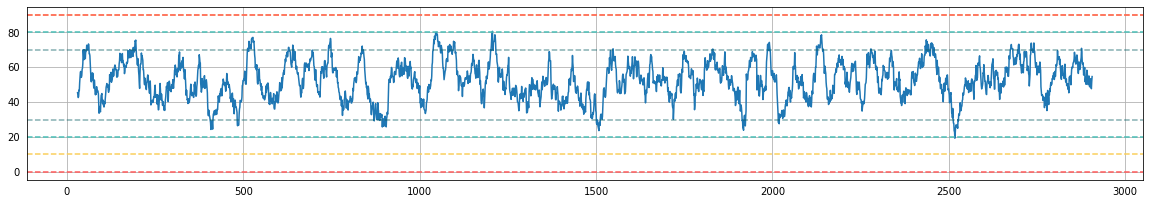

In [75]:
delta = data['Adj Close'].diff(1)
delta.dropna(inplace= True)

pos = delta.copy()
neg = delta.copy()

pos[pos<0]=0
neg[neg>0]=0

days = 30

avg_gain = pos.rolling(days).mean()
avg_loss = abs(neg.rolling(days).mean())

rel_strength = avg_gain/avg_loss

RSI = 100.0-(100.0/(1.0+rel_strength))

data['RSI'] = RSI

plt.figure(figsize=(20,7))

rsi = plt.subplot(212)
rsi.plot(data.index, data['RSI'])

rsi.axhline(0,linestyle='--', color='#ff5959')
rsi.axhline(10,linestyle='--', color='#facf5a')
rsi.axhline(20,linestyle='--', color='#49beb7')
rsi.axhline(30,linestyle='--', alpha = 0.5, color='#085f63')
rsi.axhline(70,linestyle='--', alpha = 0.5, color='#085f63')
rsi.axhline(80,linestyle='--', color='#49beb7')
rsi.axhline(90,linestyle='--', color='#facf5a')
rsi.axhline(90,linestyle='--', color='#ff5959')

rsi.grid(True)
rsi.set_axisbelow(True)
rsi.tick_params(axis='x', color='white')
rsi.tick_params(axis='y', color='white')


<AxesSubplot:>

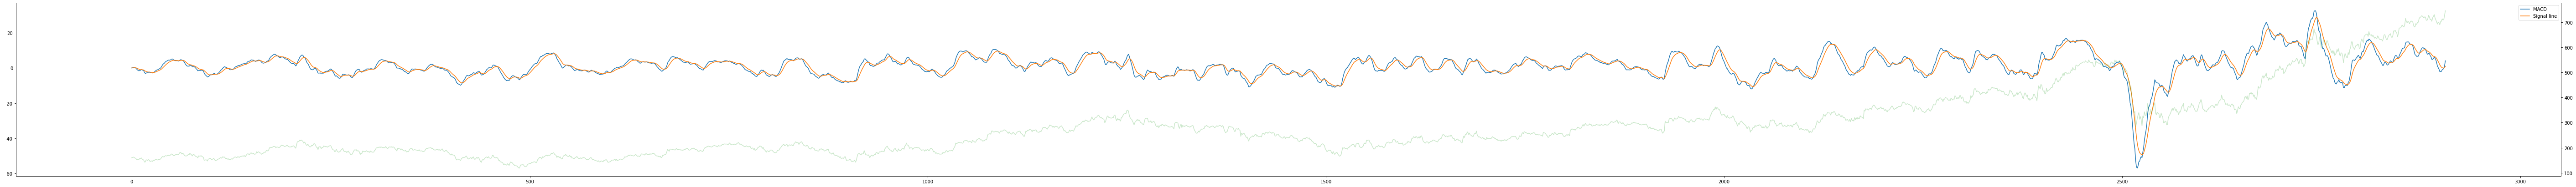

In [76]:
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()
fig, ax = plt.subplots()
data[['MACD', 'Signal line']].plot(ax=ax)
data['Close'].plot(ax=ax, alpha=0.25, secondary_y=True,figsize=(100,7))

array([[<AxesSubplot:xlabel='Open', ylabel='Open'>]], dtype=object)

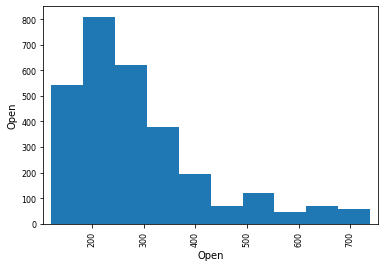

In [77]:
data_comp = pd.concat([data['Open']],axis=1)
scatter_matrix(data_comp)

In [78]:
data['returns'] = (data['Close']/data['Close'].shift(1))-1
data

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,MA200,RSI,MACD,Signal line,returns
0,2010-01-04,160.909088,159.090912,159.454544,159.945450,9162186.0,135.624359,1.460952e+09,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
1,2010-01-05,163.590912,160.272720,161.454544,161.463638,14659997.0,136.911697,2.366923e+09,NaN,NaN,NaN,NaN,0.121109,0.024222,0.009492
2,2010-01-06,164.972733,161.836365,162.727264,162.699997,20410054.0,137.960037,3.321272e+09,NaN,NaN,NaN,NaN,0.313242,0.082026,0.007657
3,2010-01-07,163.045456,159.363632,163.045456,161.163635,10852286.0,136.657318,1.769416e+09,NaN,NaN,NaN,NaN,0.337645,0.133150,-0.009443
4,2010-01-08,161.818176,158.363632,161.654541,158.899994,20580934.0,134.737885,3.327001e+09,NaN,NaN,NaN,NaN,0.172341,0.140988,-0.014046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,2021-10-11,719.400024,700.299988,702.000000,713.299988,9337637.0,713.299988,6.555021e+09,706.469996,677.029498,630.297498,53.300849,-1.062288,0.160615,0.014074
2903,2021-10-12,713.000000,704.400024,706.500000,708.599976,7376091.0,708.599976,5.211208e+09,706.859996,677.813998,631.256998,48.712051,-0.724357,-0.016379,-0.006589
2904,2021-10-13,715.900024,707.950012,713.849976,709.950012,6357766.0,709.950012,4.538491e+09,707.455996,678.729498,632.339748,47.630216,-0.343647,-0.081833,0.001905
2905,2021-10-14,729.799988,709.049988,710.250000,727.299988,8950350.0,727.299988,6.356986e+09,708.000996,679.399498,633.395998,51.774571,1.342591,0.203052,0.024438


<AxesSubplot:>

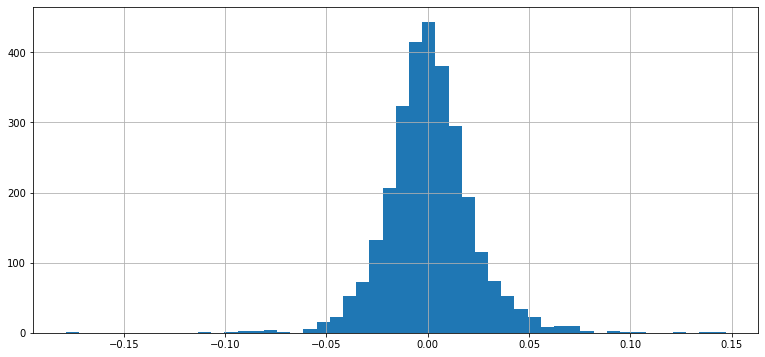

In [79]:
data['returns'].hist(bins=50,figsize=(13,6))

<AxesSubplot:ylabel='Density'>

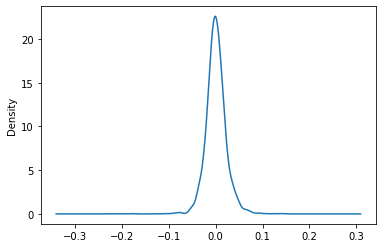

In [80]:
data['returns'].plot(kind='kde')

<AxesSubplot:>

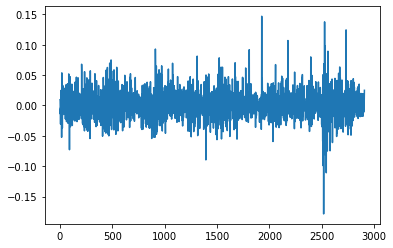

In [81]:
data['returns'].plot(kind='line')

<AxesSubplot:>

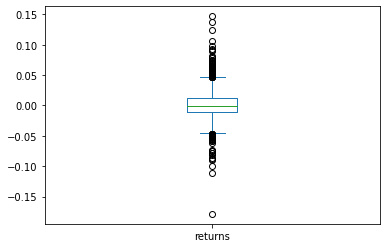

In [82]:
box_df = pd.concat([data['returns']], axis = 1)
box_df.plot(kind = 'box')

In [83]:
data['Cumulative Return'] = (1 + data['returns']).cumprod()
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,MA200,RSI,MACD,Signal line,returns,Cumulative Return
0,2010-01-04,160.909088,159.090912,159.454544,159.945450,9162186.0,135.624359,1.460952e+09,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
1,2010-01-05,163.590912,160.272720,161.454544,161.463638,14659997.0,136.911697,2.366923e+09,NaN,NaN,NaN,NaN,0.121109,0.024222,0.009492,1.009492
2,2010-01-06,164.972733,161.836365,162.727264,162.699997,20410054.0,137.960037,3.321272e+09,NaN,NaN,NaN,NaN,0.313242,0.082026,0.007657,1.017222
3,2010-01-07,163.045456,159.363632,163.045456,161.163635,10852286.0,136.657318,1.769416e+09,NaN,NaN,NaN,NaN,0.337645,0.133150,-0.009443,1.007616
4,2010-01-08,161.818176,158.363632,161.654541,158.899994,20580934.0,134.737885,3.327001e+09,NaN,NaN,NaN,NaN,0.172341,0.140988,-0.014046,0.993464


<AxesSubplot:>

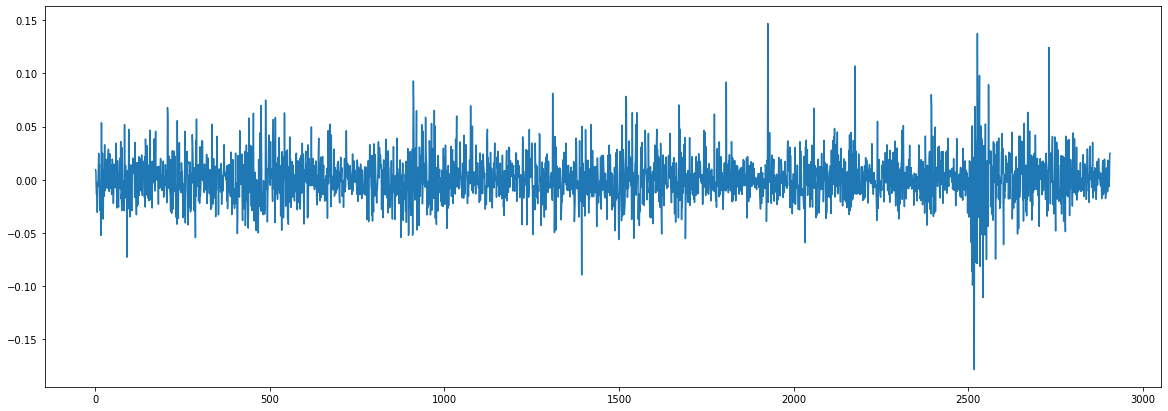

In [84]:
data['returns'].plot(figsize=(20,7))


<AxesSubplot:>

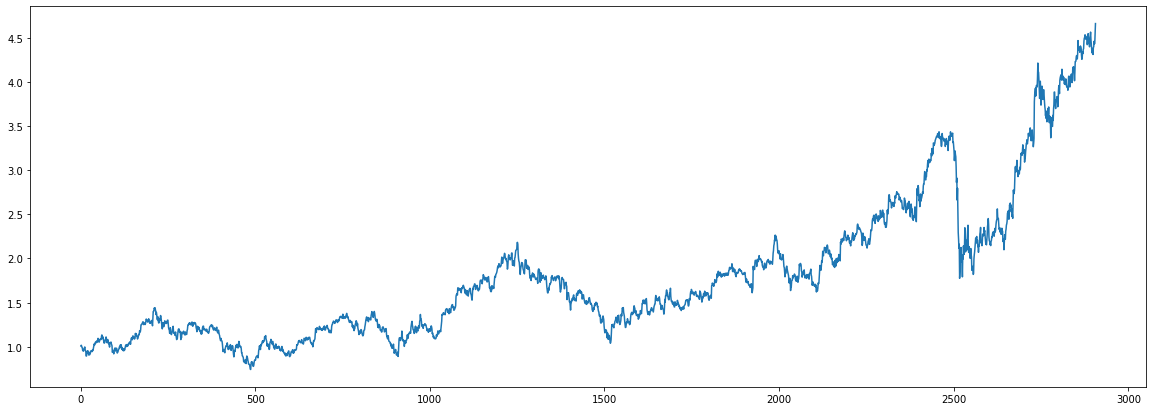

In [85]:
data['Cumulative Return'].plot(figsize=(20,7))


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2907 non-null   datetime64[ns]
 1   High               2907 non-null   float64       
 2   Low                2907 non-null   float64       
 3   Open               2907 non-null   float64       
 4   Close              2907 non-null   float64       
 5   Volume             2907 non-null   float64       
 6   Adj Close          2907 non-null   float64       
 7   Total Traded       2907 non-null   float64       
 8   MA50               2858 non-null   float64       
 9   MA100              2808 non-null   float64       
 10  MA200              2708 non-null   float64       
 11  RSI                2877 non-null   float64       
 12  MACD               2907 non-null   float64       
 13  Signal line        2907 non-null   float64       
 14  returns 

In [87]:
new_data = []
for row_set in range(0, 100000):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(data)-row_quant)
    market_subset = data.iloc[row_start:row_start+row_quant]
    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date)
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change() 
    Volume_Gap = market_subset['Volume'].pct_change() 
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    new_data.append(pd.DataFrame({'ID':[row_set]*len(market_subset), 'Close_Date':[Close_Date]*len(market_subset), 'Close_Gap':Close_Gap, 'High_Gap':High_Gap, 'Low_Gap':Low_Gap, 'Volume_Gap':Volume_Gap,'Daily_Change':Daily_Change, 'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))

0
2011-12-09 00:00:00
2000
2010-03-09 00:00:00
4000
2019-02-07 00:00:00
6000
2014-08-07 00:00:00
8000
2019-08-27 00:00:00
10000
2010-04-01 00:00:00
12000
2017-02-03 00:00:00
14000
2017-06-30 00:00:00
16000
2016-08-04 00:00:00
18000
2014-11-26 00:00:00
20000
2015-09-02 00:00:00
22000
2021-08-17 00:00:00
24000
2010-07-27 00:00:00
26000
2014-12-09 00:00:00
28000
2018-09-25 00:00:00
30000
2011-02-25 00:00:00
32000
2011-10-13 00:00:00
34000
2019-12-10 00:00:00
36000
2017-06-08 00:00:00
38000
2015-05-21 00:00:00
40000
2016-09-22 00:00:00
42000
2017-08-18 00:00:00
44000
2011-05-16 00:00:00
46000
2021-08-04 00:00:00
48000
2016-10-17 00:00:00
50000
2010-08-19 00:00:00
52000
2014-04-11 00:00:00
54000
2012-08-13 00:00:00
56000
2013-10-23 00:00:00
58000
2012-07-26 00:00:00
60000
2017-09-14 00:00:00
62000
2020-09-24 00:00:00
64000
2018-03-08 00:00:00
66000
2016-06-21 00:00:00
68000
2017-01-19 00:00:00
70000
2015-02-26 00:00:00
72000
2017-03-23 00:00:00
74000
2014-10-27 00:00:00
76000
2017-10-12 00:

In [88]:
len(market_subset)

21

In [89]:
new_set_data = pd.concat(new_data)
print(new_set_data.shape)
new_set_data = new_set_data.dropna(how='any') 
print(new_set_data.shape)


(1998985, 8)
(1798985, 8)


In [90]:
new_set_data.describe()

,ID,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
count,1.798985e+06,1.798985e+06,1.798985e+06,1.798985e+06,1.798985e+06,1.798985e+06,1.798985e+06
mean,4.999403e+04,7.696153e-04,7.238891e-04,7.631538e-04,inf,-4.101039e-04,-9.407830e+03
std,2.886500e+04,2.162969e-02,1.980260e-02,2.143674e-02,NaN,1.861026e-02,1.398261e+07
min,0.000000e+00,-1.784785e-01,-1.353201e-01,-1.801844e-01,-1.000000e+00,-9.766585e-02,-2.569911e+08
25%,2.501100e+04,-1.139545e-02,-9.259243e-03,-9.793399e-03,-2.467755e-01,-1.142223e-02,-4.851083e+06
50%,4.996600e+04,-7.932925e-05,-2.727509e-04,9.560522e-04,-6.759004e-03,-8.650519e-04,-9.113800e+04
75%,7.500300e+04,1.211642e-02,9.963133e-03,1.113632e-02,3.064455e-01,9.574104e-03,4.418388e+06
max,9.999900e+04,1.468769e-01,1.590527e-01,2.105566e-01,inf,1.825141e-01,2.611648e+08


In [91]:
new_set_data.tail(10)

,ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
2444,99999,2019-12-20,-0.006249,-0.007442,-0.008364,-0.231369,-0.009905,-11887499.0
2445,99999,2019-12-20,0.003239,-0.007873,0.001054,-0.478017,0.004675,-959434.0
2446,99999,2019-12-20,0.004179,0.001795,0.004787,-0.073911,0.005038,1746713.0
2447,99999,2019-12-20,0.009173,0.009335,0.004765,0.145300,0.005560,-1382940.0
2448,99999,2019-12-20,0.003374,0.003550,0.004932,-0.100445,0.000935,5499645.0
2449,99999,2019-12-20,0.003176,0.010613,0.011136,0.444049,-0.001580,-4814286.0
2450,99999,2019-12-20,0.004096,-0.002579,0.001867,-0.269182,-0.000463,-1554412.0
2451,99999,2019-12-20,0.003523,0.002955,0.003820,-0.118925,0.000370,1390005.0
2452,99999,2019-12-20,0.000462,-0.000184,-0.005197,0.120700,-0.001199,-823378.0
2453,99999,2019-12-20,-0.002216,-0.003131,-0.004198,-0.063797,0.005585,15608802.0


In [92]:
new_set_data.head(10)

,ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
461,0,2011-12-09,-0.047730,-0.036375,-0.047358,0.508703,-0.041168,-16160303.0
462,0,2011-12-09,0.000000,-0.020478,-0.003612,-0.352893,-0.020170,-4759920.0
463,0,2011-12-09,-0.037942,-0.019656,-0.038095,-0.160626,-0.035592,3662230.0
464,0,2011-12-09,-0.001266,-0.026672,-0.011690,0.147234,0.002351,-5498889.0
465,0,2011-12-09,-0.013501,-0.002684,0.000776,-0.192701,-0.015560,5063289.0
466,0,2011-12-09,-0.010409,-0.032046,-0.033841,0.219790,0.000130,-1341934.0
467,0,2011-12-09,-0.049994,-0.009376,-0.029546,-0.047755,-0.041028,11382173.0
468,0,2011-12-09,0.018931,-0.018277,0.011434,0.425370,0.007297,-2372816.0
469,0,2011-12-09,-0.025153,-0.015957,-0.032961,-0.062213,-0.017907,-6043108.0
470,0,2011-12-09,0.004679,-0.005405,0.012676,-0.168955,0.005647,-2236553.0


In [93]:
new_set_data['Close_Gap_LMH'] = pd.qcut(new_set_data['Close_Gap'], 3, labels=["L", "M", "H"])
new_set_data['High_Gap_LMH'] = pd.qcut(new_set_data['High_Gap'], 3, labels=["L", "M", "H"])
new_set_data['Low_Gap_LMH'] = pd.qcut(new_set_data['Low_Gap'], 3, labels=["L", "M", "H"])
new_set_data['Volume_Gap_LMH'] = pd.qcut(new_set_data['Volume_Gap'], 3, labels=["L", "M", "H"])
new_set_data['Daily_Change_LMH'] = pd.qcut(new_set_data['Daily_Change'], 3, labels=["L", "M", "H"])
new_set_data = new_set_data[["ID","Close_Date","Close_Gap_LMH","Volume_Gap_LMH","Daily_Change_LMH","Outcome_Next_Day_Direction"]]
new_set_data['Event_Pattern'] = new_set_data['Close_Gap_LMH'].astype(str) + new_set_data['Volume_Gap_LMH'].astype(str) + new_set_data['Daily_Change_LMH'].astype(str)

In [94]:
new_set_data.describe()

,ID,Outcome_Next_Day_Direction
count,1.798985e+06,1.798985e+06
mean,4.999403e+04,-9.407830e+03
std,2.886500e+04,1.398261e+07
min,0.000000e+00,-2.569911e+08
25%,2.501100e+04,-4.851083e+06
50%,4.996600e+04,-9.113800e+04
75%,7.500300e+04,4.418388e+06
max,9.999900e+04,2.611648e+08


In [95]:
new_set_data

,ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
461,0,2011-12-09,L,H,L,-16160303.0,LHL
462,0,2011-12-09,M,L,L,-4759920.0,MLL
463,0,2011-12-09,L,M,L,3662230.0,LML
464,0,2011-12-09,M,M,M,-5498889.0,MMM
465,0,2011-12-09,L,L,L,5063289.0,LLL
...,...,...,...,...,...,...,...
2449,99999,2019-12-20,M,H,M,-4814286.0,MHM
2450,99999,2019-12-20,M,L,M,-1554412.0,MLM
2451,99999,2019-12-20,M,M,M,1390005.0,MMM
2452,99999,2019-12-20,M,M,M,-823378.0,MMM


In [96]:
new_set_data['Outcome_Next_Day_Direction'].describe()

count    1.798985e+06
mean    -9.407830e+03
std      1.398261e+07
min     -2.569911e+08
25%     -4.851083e+06
50%     -9.113800e+04
75%      4.418388e+06
max      2.611648e+08
Name: Outcome_Next_Day_Direction, dtype: float64

In [97]:
compressed_set = new_set_data.groupby(['ID','Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()
print(compressed_set.shape)
compressed_set

(100000, 3)


,ID,Close_Date,Event_Pattern
0,0,2011-12-09,"{LHL, MLL, LML, MMM, LLL, LHM, LML, HHH, LML, ..."
1,1,2011-05-19,"{MMM, MMM, HHM, LML, HHM, MLM, LLL, LHL, LLM, ..."
2,2,2010-05-26,"{MLM, LML, LHL, LHM, MLM, LHL, HMH, MMM, MMM, ..."
3,3,2012-06-07,"{LHL, LHL, HHH, LLL, LHM, LLL, MLM, LHL, HLH, ..."
4,4,2018-09-12,"{MHM, MHM, LML, HHH, MLL, MMH, HHH, MMM, LLL, ..."
...,...,...,...
99995,99995,2010-10-29,"{HHH, HLH, HMH, LLM, MML, LML, LHL, MLM, MMM, ..."
99996,99996,2016-08-26,"{MLM, MMM, LML, HLH, HHH, HMH, MMM, HHH, MLM, ..."
99997,99997,2020-03-11,"{HLH, HMH, MLM, LLL, MHL, HMM, HHH, LLL, HHH, ..."
99998,99998,2016-11-08,"{MMM, LHL, MLH, HHH, HMM, LML, LML, MLM, MLM, ..."


In [98]:
compressed_outcomes = new_set_data.groupby(['ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,-7.621657e+03
std,28867.657797,1.129665e+06
min,0.000000,-3.274866e+07
25%,24999.750000,-3.918706e+05
50%,49999.500000,-1.638956e+04
75%,74999.250000,3.667111e+05
max,99999.000000,3.143267e+07


In [99]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set

(100000, 4)


,ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2011-12-09,"{LHL, MLL, LML, MMM, LLL, LHM, LML, HHH, LML, ...",-2.416483e+05
1,1,2011-05-19,"{MMM, MMM, HHM, LML, HHM, MLM, LLL, LHL, LLM, ...",-1.853225e+05
2,2,2010-05-26,"{MLM, LML, LHL, LHM, MLM, LHL, HMH, MMM, MMM, ...",2.870823e+05
3,3,2012-06-07,"{LHL, LHL, HHH, LLL, LHM, LLL, MLM, LHL, HLH, ...",-3.012856e+04
4,4,2018-09-12,"{MHM, MHM, LML, HHH, MLL, MMH, HHH, MMM, LLL, ...",-4.975113e+04
...,...,...,...,...
99995,99995,2010-10-29,"{HHH, HLH, HMH, LLM, MML, LML, LHL, MLM, MMM, ...",1.508129e+06
99996,99996,2016-08-26,"{MLM, MMM, LML, HLH, HHH, HMH, MMM, HHH, MLM, ...",-3.203323e+04
99997,99997,2020-03-11,"{HLH, HMH, MLM, LLL, MHL, HMM, HHH, LLL, HHH, ...",5.515543e+05
99998,99998,2016-11-08,"{MMM, LHL, MLH, HHH, HMM, LML, LML, MLM, MLM, ...",6.643064e+05


In [100]:
compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','').replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set

,ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2011-12-09,"LHL,MLL,LML,MMM,LLL,LHM,LML,HHH,LML,MLM,LML,HM...",-2.416483e+05
1,1,2011-05-19,"MMM,MMM,HHM,LML,HHM,MLM,LLL,LHL,LLM,LML,HHH,ML...",-1.853225e+05
2,2,2010-05-26,"MLM,LML,LHL,LHM,MLM,LHL,HMH,MMM,MMM,HLM,LML,LH...",2.870823e+05
3,3,2012-06-07,"LHL,LHL,HHH,LLL,LHM,LLL,MLM,LHL,HLH,LHM,LLL,HH...",-3.012856e+04
4,4,2018-09-12,"MHM,MHM,LML,HHH,MLL,MMH,HHH,MMM,LLL,LHL,MMH,ML...",-4.975113e+04
...,...,...,...,...
99995,99995,2010-10-29,"HHH,HLH,HMH,LLM,MML,LML,LHL,MLM,MMM,HHH,LLL,LL...",1.508129e+06
99996,99996,2016-08-26,"MLM,MMM,LML,HLH,HHH,HMH,MMM,HHH,MLM,MLL,LHM,MM...",-3.203323e+04
99997,99997,2020-03-11,"HLH,HMH,MLM,LLL,MHL,HMM,HHH,LLL,HHH,LLM,MHM,ML...",5.515543e+05
99998,99998,2016-11-08,"MMM,LHL,MLH,HHH,HMM,LML,LML,MLM,MLM,LHL,MLM,HH...",6.643064e+05


In [101]:
compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() - datetime.timedelta(days=270)]
compressed_set_validation.shape

(5284, 4)

In [102]:
list(compressed_set)

['ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [103]:
compressed_set = compressed_set[['ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

### Keep big moves only and build outcome variable

In [104]:
compressed_set['Outcome_Next_Day_Direction'].describe()

count    1.000000e+05
mean    -7.621657e+03
std      1.129665e+06
min     -3.274866e+07
25%     -3.918706e+05
50%     -1.638956e+04
75%      3.667111e+05
max      3.143267e+07
Name: Outcome_Next_Day_Direction, dtype: float64

In [105]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000])

100000


133

In [106]:
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))     

all moves: 100000
big moves only: 133


In [107]:
compressed_set

,ID,Event_Pattern,Outcome_Next_Day_Direction
1518,1518,"LHL,HLH,LLM,MHH,HLH,HHH,LLL,HHM,HLH",0
1699,1699,"LML,HHH,MHM,MLM,LHL,MLM,MMM,MLL,MHH",1
1709,1709,"HHH,LLL,HHH,LLM,MLM,MHM,HHH,MML,MLL,MLM,MMM,HM...",0
1996,1996,"HHH,LLL,HHH,LLM,MLM,MHM,HHH,MML,MLL,MLM,MMM,HMM",0
2589,2589,"LHL,HLH,LLM,MHH,HLH,HHH,LLL,HHM",0
...,...,...,...
96963,96963,"HHH,LLL,HHH,LLM,MLM,MHM,HHH,MML,MLL,MLM,MMM,HM...",0
98604,98604,"LHL,HLH,HLH,LLL,LHL,LML,LMM,LLL,MMH,MHH,LLM,LH...",0
98894,98894,"HHH,LLL,HHH,LLM,MLM,MHM,HHH,MML,MLL,MLM,MMM,HM...",0
99005,99005,"MMM,LLL,LHM,LML,HHH,LML,MLM,LML,HMH,LHL",1


In [108]:
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(65, 2)
(68, 2)


In [109]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

20

In [110]:
compressed_set['Outcome_Next_Day_Direction'].head()       

1518    0
1699    1
1709    0
1996    0
2589    0
Name: Outcome_Next_Day_Direction, dtype: int32

### Build the markov transition grid

In [111]:
def build_transition_grid(compressed_grid, unique_patterns):

    patterns = []
    counts = []
    for from_event in unique_patterns:

        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event 

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    grid_data = pd.DataFrame({'pairs':patterns, 'counts': counts})

    para = grid_data['pairs'].str.split(',', 1)
    grid_data['x'], grid_data['y'] = para.str[0],para.str[1]


    # grid_data['x'], grid_data['y'] = grid_data['pairs'].str.split(',', 1).str



    grid_data.head()

    grid_data = grid_data.pivot(index='x', columns='y', values='counts')

    grid_data.columns= [col for col in grid_data.columns]
    grid_data.fillna(0, inplace=True)
    grid_data.head()
    grid_data = grid_data / grid_data.sum(1)
    return (grid_data)

In [112]:
compressed_set_pos

,ID,Event_Pattern
1699,1699,"LML,HHH,MHM,MLM,LHL,MLM,MMM,MLL,MHH"
5775,5775,"MLL,LML,MMM,LLL,LHM,LML,HHH,LML,MLM,LML,HMH,LHL"
5864,5864,"MML,HHH,MLL,HHH,HLH,LML,HHH,MHM,MLM,LHL,MLM,MM..."
7441,7441,"HHH,MHH,MLM,LML,MHH,MLM,HHH,HLH,LLL,HHH"
9004,9004,"HHH,MML,HHH,MLL,HHH,HLH,LML,HHH,MHM,MLM,LHL,ML..."
...,...,...
91352,91352,"MML,HLH,HHH,HHH,MML,HLH,LHL,LHL"
92950,92950,"MMM,HHH,HMM,MLM,LHL,LLM,HHH,HLH"
94583,94583,"HHH,HMH,LLL,LML,MLL,HHH,MML,HHH,MLL,HHH,HLH,LM..."
96696,96696,"MLM,LML,MHH,MLM,HHH,HLH,LLL,HHH"


In [113]:
compressed_set_neg

,ID,Event_Pattern
1518,1518,"LHL,HLH,LLM,MHH,HLH,HHH,LLL,HHM,HLH"
1709,1709,"HHH,LLL,HHH,LLM,MLM,MHM,HHH,MML,MLL,MLM,MMM,HM..."
1996,1996,"HHH,LLL,HHH,LLM,MLM,MHM,HHH,MML,MLL,MLM,MMM,HMM"
2589,2589,"LHL,HLH,LLM,MHH,HLH,HHH,LLL,HHM"
3575,3575,"HHH,LLL,HHH,LLM,MLM,MHM,HHH,MML,MLL,MLM,MMM,HM..."
...,...,...
93526,93526,"HHH,LLL,MLL,MLM,MMM,HHH,LHL,MLH,LML"
96963,96963,"HHH,LLL,HHH,LLM,MLM,MHM,HHH,MML,MLL,MLM,MMM,HM..."
98604,98604,"LHL,HLH,HLH,LLL,LHL,LML,LMM,LLL,MMH,MHH,LLM,LH..."
98894,98894,"HHH,LLL,HHH,LLM,MLM,MHM,HHH,MML,MLL,MLM,MMM,HM..."


In [114]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 

In [115]:
grid_neg

,HHH,HHM,HLH,HLM,HMH,HMM,LHL,LHM,LLL,LLM,LML,LMM,MHH,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,
HHH,0.000000,0.0,0.083333,NaN,0.000000,0.000000,0.175,NaN,0.738636,0.84,0.296296,0.0,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.951220,0.000000
HHM,0.000000,0.0,0.055556,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HLH,0.023810,0.0,0.305556,NaN,0.000000,0.000000,0.000,NaN,0.159091,0.08,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.022059,0.000000,0.000000,0.000000
HLM,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HMH,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.00,0.000000,0.0,0.000000,0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.015038
HMM,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248120
LHL,0.000000,0.0,0.416667,NaN,1.000000,0.000000,0.000,NaN,0.034091,0.00,0.407407,0.0,0.000000,0.000000,1.166667,0.000000,0.007353,0.000000,0.000000,0.000000
LHM,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LLL,0.232143,2.0,0.000000,NaN,0.000000,0.000000,0.275,NaN,0.000000,0.00,0.074074,0.0,0.000000,0.000000,0.000000,0.155556,0.088235,0.642857,0.073171,0.007519


In [116]:
grid_pos

,HHH,HHM,HLH,HLM,HMH,HMM,LHL,LHM,LLL,LLM,LML,LMM,MHH,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,
HHH,0.039548,0.000000,0.691176,0.0,0.514286,0.666667,0.000000,0.000000,0.044444,0.0,0.129630,NaN,0.181818,0.736842,NaN,0.301205,0.000000,0.0,0.714286,0.000000
HHM,0.000000,0.000000,0.058824,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000
HLH,0.039548,0.333333,0.000000,0.0,0.000000,0.000000,0.150000,0.000000,0.133333,0.0,0.240741,NaN,0.000000,0.131579,NaN,0.000000,0.000000,0.0,0.000000,0.213115
HLM,0.000000,0.000000,0.000000,0.0,0.057143,0.000000,0.000000,0.000000,0.000000,0.0,0.018519,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000
HMH,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.233333,0.000000,0.422222,0.0,0.018519,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000
HMM,0.000000,0.000000,0.029412,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.042553,0.0,0.000000,0.000000
LHL,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.300000,0.000000,0.022222,1.0,0.000000,NaN,0.000000,0.000000,NaN,0.084337,0.319149,0.0,0.000000,0.000000
LHM,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.129630,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000
LLL,0.033898,0.000000,0.000000,0.0,0.000000,0.333333,0.016667,0.785714,0.000000,0.0,0.185185,NaN,0.000000,0.052632,NaN,0.000000,0.000000,0.0,0.000000,0.049180


In [117]:
compressed_set_validation

,ID,Event_Pattern,Outcome_Next_Day_Direction
5,5,"LML,MLM,HMH,HLH,MHH,MMM,LHL,MLM,HMM,HHH,MLM,ML...",0
9,9,"HMM,HLH,LHL,LHL,HLM,MMM,HMH,LHM,LMM,MLM,HHH,ML...",0
47,47,"HMH,MMM,HHH,HHH,MLL,MLM,MMM,MLM",0
55,55,"MLL,HMM,MMM,LML,MMH,HHH,HMH,LLM,LML,HHH,HMH,ML...",1
57,57,"MMM,MHM,LLL,HHH,LLL,MMM,MLM,LHL,HLM,LHL,LHL,ML...",1
...,...,...,...
99900,99900,"MHM,LML,HMH,HMM,HLH,LHL,LMM,LHL,LLM,HLM,MMH,LH...",0
99907,99907,"HMH,MLM,LML,LML,MLM,HMH,HLH,MHH,MMM,LHL,MLM,HM...",0
99908,99908,"LHM,LMM,MLM,HHH,MLM,LHL,LML,LLL",0
99938,99938,"HMM,HHH,MLM,MLM,LML,MMH,LHL,HMM,HHH,MHM,MLM,HH...",1


In [118]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

actual = []
predicted = []
for seq_id in compressed_set_validation['ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    for id in range(0, len(patterns)-1):
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):      
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        log_odds.append(log_value)
        pos.append(numerator)
        neg.append(denominator)  
    print('outcome:', compressed_set_validation[compressed_set_validation['ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))
    actual.append(compressed_set_validation[compressed_set_validation['ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))
confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 0
6.967220108453697
24.093593514164585
outcome: 0
nan
nan
outcome: 0
1.181691296678018
18.126941693528313
outcome: 1
nan
nan
outcome: 1
nan
nan
outcome: 1
0.8697987306791211
25.201435839893165
outcome: 1
nan
nan
outcome: 0
0.8765757794903231
22.174775285855098
outcome: 0
nan
nan
outcome: 0
2.2155225362679465
26.656059351626194
outcome: 0
nan
nan
outcome: 0
nan
nan
outcome: 1
nan
nan
outcome: 0
nan
nan
outcome: 0
nan
nan
outcome: 1
nan
nan
outcome: 1
1.8061694694558823
11.945096862651358
outcome: 1
0.9977506171462628
24.203467077004742
outcome: 0
nan
nan
outcome: 0
4.22134985290994
27.85836379387348
outcome: 0
3.4022396429779898
15.329574286790578
outcome: 0
nan
nan
outcome: 0
nan
nan
outcome: 1
nan
nan
outcome: 1
1.178499845780299
18.276987379986174
outcome: 0
nan
nan
outcome: 1
nan
nan
outcome: 0
1.3253536324365882
23.03424354965582
outcome: 0
nan
nan
outcome: 0
0.17609533390889334
1.2354217001884111
outcome: 1
nan
nan
outcome: 1
1.9529119186700297
37.95903219792108
outcome: 

C:\Users\Shashwat\AppData\Local\Temp/ipykernel_24640/2296525957.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  print(sum(pos)/sum(neg))


outcome: 1
0.9720638043431725
22.93934034985906
outcome: 1
nan
nan
outcome: 0
nan
nan
outcome: 0
nan
nan
outcome: 0
0.7201142869676457
17.73244395250534
outcome: 1
nan
nan
outcome: 1
0.08278668840607185
-4.3776420363560575
outcome: 1
0.37987355022170854
-15.64462127206726
outcome: 0
nan
nan
outcome: 0
nan
nan
outcome: 1
nan
nan
outcome: 1
0.4984062645509518
16.08924010883714
outcome: 1
nan
nan
outcome: 0
nan
nan
outcome: 0
nan
nan
outcome: 1
nan
nan
outcome: 0
nan
nan
outcome: 1
nan
nan
outcome: 0
4.22134985290994
27.85836379387348
outcome: 0
nan
nan
outcome: 0
nan
nan
outcome: 1
nan
nan
outcome: 0
nan
nan
outcome: 1
0.20385475301476344
-2.5985110909154105
outcome: 1
nan
nan
outcome: 0
nan
nan
outcome: 1
1.515137531147333
33.01183907434567
outcome: 0
nan
nan
outcome: 0
0.8606843350461872
20.296687733138544
outcome: 1
nan
nan
outcome: 1
1.0312339989759343
-1.4759065198095769
outcome: 1
2.333100898814477
22.380463448151307
outcome: 0
nan
nan
outcome: 0
nan
nan
outcome: 0
nan
nan
outcome:

array([[2541,  555],
       [1410,  778]], dtype=int64)

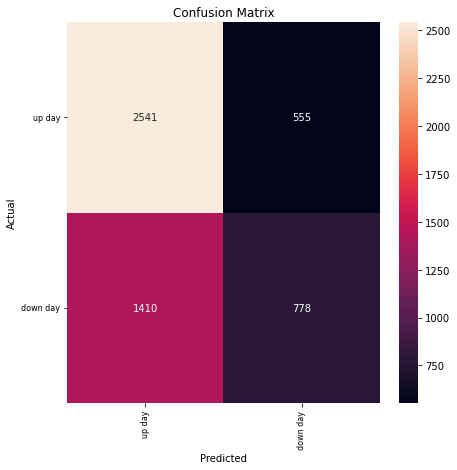

In [119]:
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()

In [120]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
Accuracy = round(score * 100,2)
print('Accuracy:',Accuracy , '%')

Accuracy: 62.81 %


In [121]:
print(stockname)

icicibank.ns


In [122]:
print(enddate)
print(startdate)

2021-10-18
2010-01-01


In [123]:
result_list = [stockname,startdate,enddate,Accuracy]

In [124]:
with open('result.csv', 'a') as result_data:
    write_data = writer(result_data)
    write_data.writerow(result_list)
    result_data.close()

In [125]:
total_acc = pd.read_csv('result.csv')
total_acc

,Name(National Stock Exchange of India Ltd ),Start Date,End Date,Accuracy(%)
0,ICICIBANK.NS,2010-01-01,2021-10-18,59.31
1,TCS.NS,2010-01-01,2021-10-18,53.70
2,HDFCBANK.NS,2010-01-01,2021-10-18,52.13
3,INFY.NS,2010-01-01,2021-10-18,52.75
4,HINDUNILVR.NS,2010-01-01,2021-10-18,56.55
...,...,...,...,...
96,PNB.NS,2010-01-01,2021-10-18,55.85
97,AUBANK.NS,2010-01-01,2021-10-18,58.06
98,BANKBARODA.NS,2010-01-01,2021-10-18,55.57
99,GUJGASLTD.NS,2010-01-01,2021-10-18,56.95


In [126]:
print('Full Model Accuracy(%) :', total_acc['Accuracy(%)'].mean())

Full Model Accuracy(%) : 55.4410891089109
